In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from utils import *

In [31]:
import glob
import os
import pandas as pd
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

In [4]:
paths = sorted(glob.glob(os.path.join(RAW_DATA_PATH, '*.csv')))

In [5]:
paths[:10]

['/home/aysola/midas-applied-ds/Data/Raw/VED/VED_171101_week.csv',
 '/home/aysola/midas-applied-ds/Data/Raw/VED/VED_171108_week.csv',
 '/home/aysola/midas-applied-ds/Data/Raw/VED/VED_171115_week.csv',
 '/home/aysola/midas-applied-ds/Data/Raw/VED/VED_171122_week.csv',
 '/home/aysola/midas-applied-ds/Data/Raw/VED/VED_171129_week.csv',
 '/home/aysola/midas-applied-ds/Data/Raw/VED/VED_171206_week.csv',
 '/home/aysola/midas-applied-ds/Data/Raw/VED/VED_171213_week.csv',
 '/home/aysola/midas-applied-ds/Data/Raw/VED/VED_171220_week.csv',
 '/home/aysola/midas-applied-ds/Data/Raw/VED/VED_171227_week.csv',
 '/home/aysola/midas-applied-ds/Data/Raw/VED/VED_180103_week.csv']

In [6]:
os.path.basename(paths[10])

'VED_180110_week.csv'

In [7]:
data = pd.read_csv(paths[0])

In [8]:
data['Trip'].value_counts()

1866    6358
736     3391
789     3116
990     3016
982     2958
        ... 
893      106
60       106
325      105
1599     103
768      101
Name: Trip, Length: 658, dtype: int64

In [9]:
data.columns

Index(['DayNum', 'VehId', 'Trip', 'Timestamp(ms)', 'Latitude[deg]',
       'Longitude[deg]', 'Vehicle Speed[km/h]', 'MAF[g/sec]',
       'Engine RPM[RPM]', 'Absolute Load[%]', 'OAT[DegC]', 'Fuel Rate[L/hr]',
       'Air Conditioning Power[kW]', 'Air Conditioning Power[Watts]',
       'Heater Power[Watts]', 'HV Battery Current[A]', 'HV Battery SOC[%]',
       'HV Battery Voltage[V]', 'Short Term Fuel Trim Bank 1[%]',
       'Short Term Fuel Trim Bank 2[%]', 'Long Term Fuel Trim Bank 1[%]',
       'Long Term Fuel Trim Bank 2[%]'],
      dtype='object')

In [21]:
ave_speed_func = lambda x: x['Vehicle Speed[km/h]'].mean()
ave_speed = extract_trip_info(paths[:2], ave_speed_func)

100%|██████████| 2/2 [00:03<00:00,  1.71s/it]


In [26]:
ave_speed

,Trip,values
0,1866,5.864737
1,736,25.347095
2,789,55.677340
3,990,38.500205
4,982,37.081812
...,...,...
1038,1110,69.907407
1039,1057,39.809524
1040,310,45.211538
1041,1301,44.634615


(array([  8.,  74., 235., 356., 223.,  84.,  33.,  14.,  12.,   2.]),
 array([  2.61940299,  12.81421556,  23.00902814,  33.20384071,
         43.39865329,  53.59346586,  63.78827844,  73.98309101,
         84.17790359,  94.37271616, 104.56752874]),
 <BarContainer object of 10 artists>)

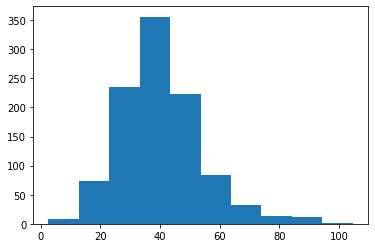

In [32]:
plt.hist(ave_speed['values'])